In [1]:
!pip install opendatasets 

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/adityakadiwal/water-potability")

Skipping, found downloaded files in ".\water-potability" (use force=True to force download)


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
df = pd.read_csv('./water-potability/water_potability.csv')

## EDA and visualizations

In [5]:
df.head(9)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0


In [6]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [7]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<AxesSubplot:xlabel='Potability', ylabel='count'>

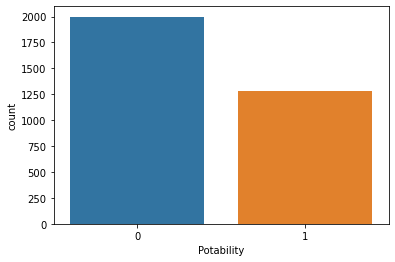

In [8]:
sns.countplot(df.Potability)

array([[<AxesSubplot:xlabel='ph', ylabel='ph'>,
        <AxesSubplot:xlabel='Hardness', ylabel='ph'>,
        <AxesSubplot:xlabel='Solids', ylabel='ph'>,
        <AxesSubplot:xlabel='Chloramines', ylabel='ph'>,
        <AxesSubplot:xlabel='Sulfate', ylabel='ph'>,
        <AxesSubplot:xlabel='Conductivity', ylabel='ph'>,
        <AxesSubplot:xlabel='Organic_carbon', ylabel='ph'>,
        <AxesSubplot:xlabel='Trihalomethanes', ylabel='ph'>,
        <AxesSubplot:xlabel='Turbidity', ylabel='ph'>,
        <AxesSubplot:xlabel='Potability', ylabel='ph'>],
       [<AxesSubplot:xlabel='ph', ylabel='Hardness'>,
        <AxesSubplot:xlabel='Hardness', ylabel='Hardness'>,
        <AxesSubplot:xlabel='Solids', ylabel='Hardness'>,
        <AxesSubplot:xlabel='Chloramines', ylabel='Hardness'>,
        <AxesSubplot:xlabel='Sulfate', ylabel='Hardness'>,
        <AxesSubplot:xlabel='Conductivity', ylabel='Hardness'>,
        <AxesSubplot:xlabel='Organic_carbon', ylabel='Hardness'>,
        <AxesSubplot:

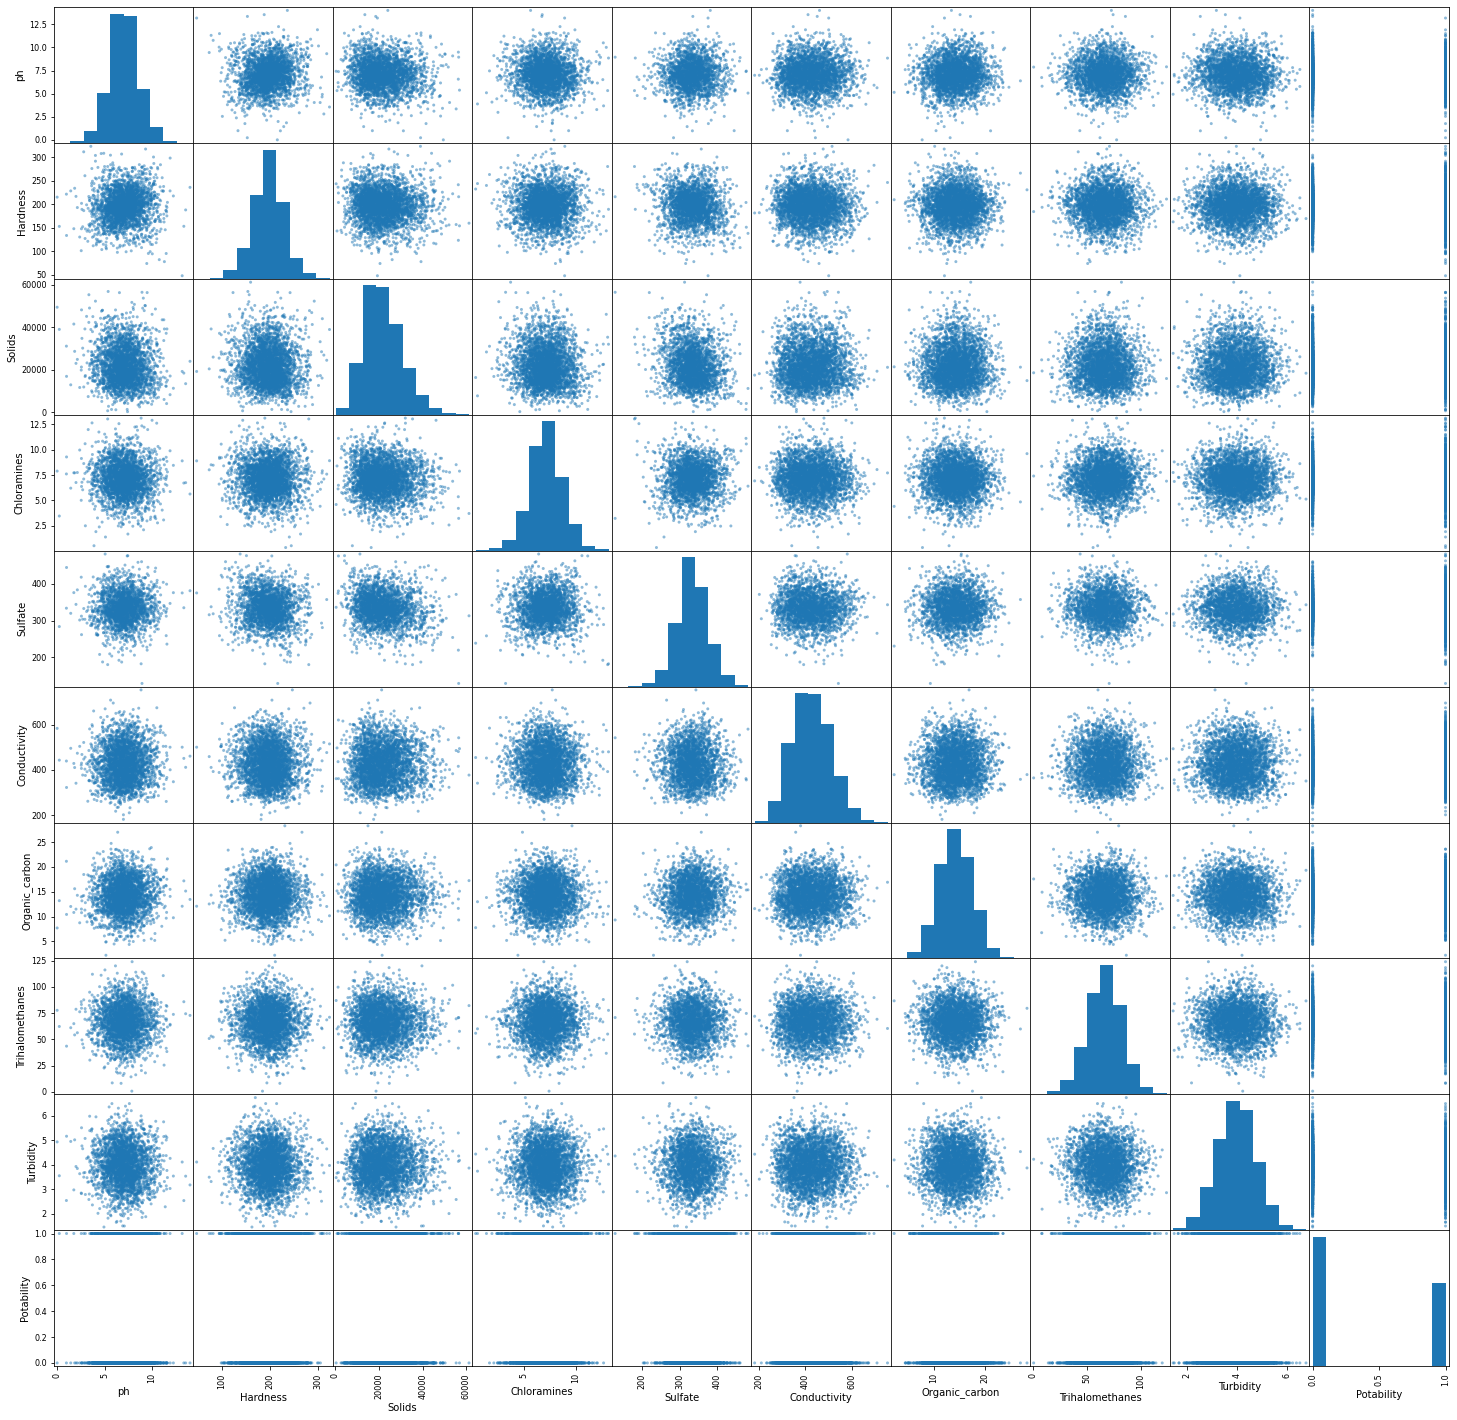

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(25,25))

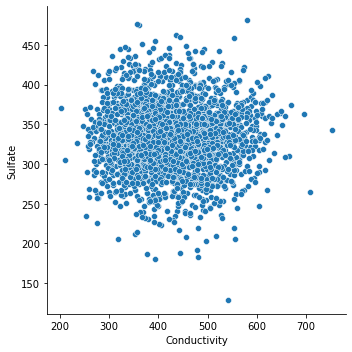

In [10]:
sns.relplot(df.Conductivity, df.Sulfate)

<AxesSubplot:ylabel='Frequency'>

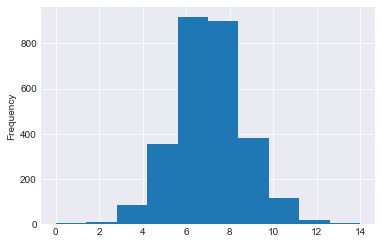

In [11]:
plt.style.use('seaborn-darkgrid')
df.ph.plot.hist()

<AxesSubplot:>

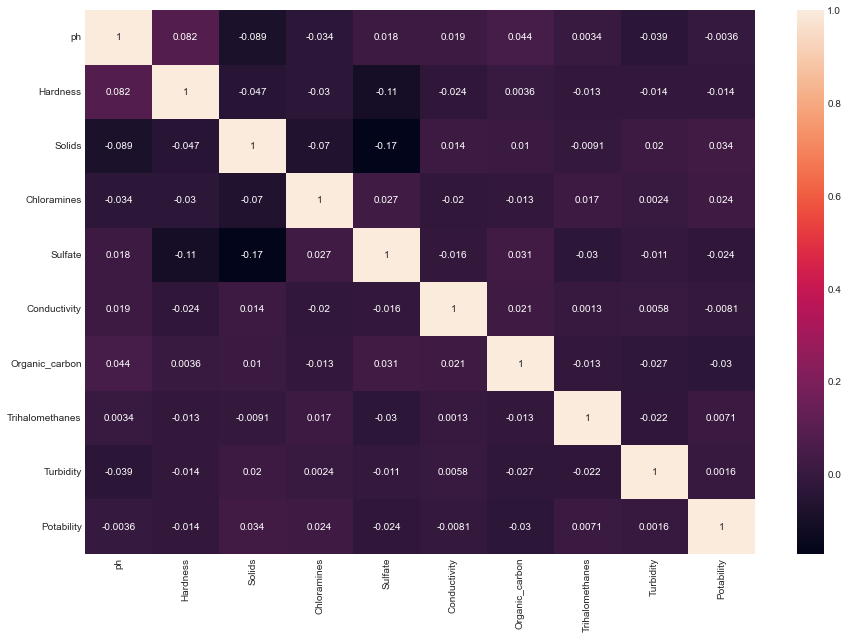

In [12]:
fig, ax = plt.subplots(figsize = (15,10))
corr = df.corr()
sns.heatmap(corr, annot= True)

In [13]:
print(df.Trihalomethanes.max() - df.Trihalomethanes.min())
print(df.Sulfate.max() - df.Sulfate.min())

123.262
352.03064230599716


## Data preprocessing

In [14]:
df.Trihalomethanes.fillna(df.Trihalomethanes.mean(), inplace = True)

In [15]:
df.Sulfate.dropna(inplace = True)

In [16]:
df.ph.fillna(df.ph.mean(), inplace = True )


In [17]:
df.dropna(inplace = True)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [19]:
x = df.drop('Potability', axis = 1)
y = df['Potability']
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size = 0.22)

In [32]:
models = { "rfc" : RandomForestClassifier(),
           "lg"  : LogisticRegression(),
           "knc" : KNeighborsClassifier()
}
def fit_and_score(models, x_train, x_test, y_train, y_test):
    model_scores = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores


In [33]:
model_scores = fit_and_score(models, x_train, x_test, y_train, y_test)
model_scores

{'rfc': 0.663023679417122, 'lg': 0.5719489981785064, 'knc': 0.5591985428051002}

<AxesSubplot:>

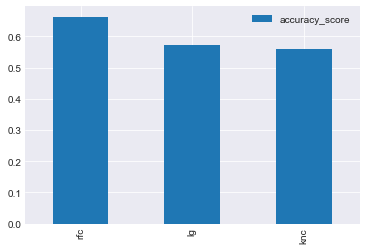

In [34]:
accuracy_score = pd.DataFrame(data = model_scores, index = ['accuracy_score'])
accuracy_score.T.plot(kind = 'bar')

In [25]:
!pip install xgboost

In [26]:
import xgboost as xg
from sklearn.model_selection import GridSearchCV

In [27]:
xgb = xg.XGBClassifier().fit(x_train, y_train)
xgb.score(x_test, y_test)

[14:06:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6520947176684881

In [28]:
params1 = { 'max_depth' : range(5,9, 2), 
           'min_child_weight' : range(1,32, 2),        
}

gs = GridSearchCV(estimator = xg.XGBClassifier(eval_metric='mlogloss'),param_grid= params1, cv= 5)

gs.fit(x_train, y_train)
gs.score(x_test, y_test)


0.6411657559198543

In [29]:
params2 = {'subsample':[i/10.0 for i in range(6,10)],
           'colsample_bytree':[i/10.0 for i in range(6,10)],
           'gamma':[i/10.0 for i in range(0,5)],
           }
gs2 = GridSearchCV(estimator = xg.XGBClassifier(eval_metric= 'mlogloss'), param_grid= params2, cv= 5)
gs2.fit(x_train, y_train)
gs2.score(x_test, y_test)

0.6612021857923497

In [30]:
gs.best_params_

{'max_depth': 5, 'min_child_weight': 11}

In [31]:
pd.concat([accuracy_score, gs2'])

SyntaxError: EOL while scanning string literal (Temp/ipykernel_37808/3560884803.py, line 1)

In [38]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_grid = {  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                 'bootstrap': [True, False],
                 'max_features': ['auto', 'sqrt'],
                 'min_samples_leaf': [1, 2, 4],
                 'min_samples_split': [2, 5, 10],
                 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [39]:
print(random_grid)

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'bootstrap': [True, False], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [41]:
rfc = RandomForestClassifier()
rf_hyperparametered = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, 
                               verbose=2, random_state=42, n_jobs = -1)

rf_hyperparametered.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [42]:
rf_hyperparametered.score(x_test, y_test)

0.6739526411657559

## Pickling the model

In [35]:
import pickle

In [36]:
pickle.dump(gs, open('gb.pkl', 'wb'))

In [43]:
pickle.dump(rf_hyperparametered, open('rfc.pkl', 'wb'))